In [1]:
%matplotlib inline

from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray
import xbout
import scipy
import re

onedrive_path = onedrive_path = str(os.getcwd()).split("OneDrive")[0] + "OneDrive"
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\sdtools"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\soledge"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages"))

from hermes3.utils import *

import gridtools.solps_python_scripts.setup
from gridtools.solps_python_scripts.utilities.last10s       import read_last10s

from hermes3.fluxes import *
from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *

from code_comparison.code_comparison import *
from code_comparison.viewer_2d import *


%load_ext autoreload
%autoreload 2

plt.close("all")
%matplotlib inline

print("Done")


st40_phys_viewer can not be loaded from outside Tokamak Energy!

Done


# Overview

### I tuned fast recycling and went to MFP 0.1 with separate limiters and conduction limitation

# Hermes IO

In [2]:
casestore = dict()

In [4]:
   
db = CaseDB()
toload = [
    dict(name="frec_tune", id = "d19aec-also_tune_frec"),
    dict(name="afn_frec", id = "d22b-19aeb_allnewfrec_B_chained_mfp0.1"),
    dict(name="afn_tunefrec", id = "d22ba-also_tunefrec"),
    dict(name="afn_seplims", id = "d22bb-also_seplims"),
    dict(name="afn_cond0.5", id = "d22bc-also_cond0.5"),
]
casestore = {}
for case in toload:
    casestore[case["name"]] = db.load_case_2D(case["id"], use_squash = True, verbose = True)

- Reading case d19aec-also_tune_frec
-----------------------
- Looking for squash file
- Squash file found. squash date 10/10/2023, 15:03:07, dmp file date 10/10/2023, 14:51:56

- Reading case d22b-19aeb_allnewfrec_B_chained_mfp0.1
-----------------------
- Looking for squash file
- Squash file found. squash date 10/10/2023, 13:16:52, dmp file date 10/10/2023, 11:57:57

- Reading case d22ba-also_tunefrec
-----------------------
- Looking for squash file
- Squashoutput file not found, creating...
- Done

- Reading case d22bb-also_seplims
-----------------------
- Looking for squash file
- Squashoutput file not found, creating...
- Done

- Reading case d22bc-also_cond0.5
-----------------------
- Looking for squash file
- Squashoutput file not found, creating...
- Done



In [5]:
plt.close("all")
%matplotlib inline

## Read Hermes data

In [6]:
hr = dict()
for hermes_case in casestore.keys(): 
    print(hermes_case)
    hr[hermes_case] = Hermesdata()
    hr[hermes_case].read_case(casestore[hermes_case].ds.isel(t=-1, x = slice(2,-2)))

frec_tune
afn_frec
afn_tunefrec
afn_seplims
afn_cond0.5


# Read SOLEDGE CSV data

In [7]:
soledgecases = {
    "tightwall_1e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallMike_bra_nocore_D_1e19"), # Hermes-3 like wall
    "tightwall_2e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallMike_bra_nocore_D_2e19"), # Hermes-3 like wall
    "widewall_2e19_5m" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallStd_bra_nocore_D_2e19_5M"),
    "tightwall_3e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallMike_bra_nocore_D_3e19"), # Hermes-3 like wall
    "widewall_1e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallStd_bra_nocore_D_1e19"), 
    "widewall_2e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallStd_bra_nocore_D_2e19"), 
    "widewall_3e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\ST40_wallStd_bra_nocore_D_3e19"), 
}

sl = dict()

for name in soledgecases:
    path = soledgecases[name]
    sl[name] = SOLEDGEdata(path = path)
    sl[name].read_csv(os.path.join(path, "omp_plasma.csv"), mode = "plot1d_omp")
    sl[name].read_csv(os.path.join(path, "omp_neutrals.csv"), mode = "plot1d_omp")
    sl[name].read_csv(os.path.join(path, "imp_plasma.csv"), mode = "plot1d_imp")
    sl[name].read_csv(os.path.join(path, "imp_neutrals.csv"), mode = "plot1d_imp")
    sl[name].read_csv(os.path.join(path, "wall_ntmpi_plasma.csv"), mode = "wall_ntmpi")



c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)
c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)
c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)
c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)
c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astyp

## Read SOLPS

In [8]:
solpscases = {
    "base" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5"),
    "noiz_core" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16"),
    "gammai_2.5" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.GAMMAI=2.5E+00"),
    "dpuff_1e22" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.D2PUFF=1.0E+22"),
    "dpuff_5e21" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.D2PUFF=5.0E+21"),
    "no_fast_reflec" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.Pf=0"),
    "nsep_2e19" : os.path.join(onedrive_path,r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_core_extent\.core_extent.b2tqca_phm0=0.nesepm=2E+19"),
    "nsep_3e19" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_core_extent\.core_extent.b2tqca_phm0=0.nesepm=3E+19"),
    "narrow_core" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_core_extent\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.core_extent"),
    "no_visc" : os.path.join(onedrive_path, r"Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_core_extent\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.core_extent.b2tqca_phm0=0"),
    "16x_mc" : os.path.join(onedrive_path, r"C:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE_core_extent\HERMES_SOLEDGE.S33600_Tamb_case.xxx.BCCON=16.core_extent.MC.histories.x16-ish.NOT.converged"),
}

sp = dict()

for name in solpscases:
    sp[name] = SOLPSdata()
    sp[name].read_last10s(solpscases[name])

c:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5\last10s.pkl loaded
c:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16\last10s.pkl loaded
c:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.GAMMAI=2.5E+00\last10s.pkl loaded
c:\Users\mikek\OneDrive\Project\collab\tech\compare_data\playAround_ST40_IVC2_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK.Js=OFF.GAMMAE=4.5.eirene_ionising_core=0.BCCON=16.D2PUFF=1.0E+22\last10s.pkl loaded
c:\Users\mikek\OneDrive\Project\collab\tech\co

In [17]:
for name in casestore:

    ds = casestore[name].ds
    ds = calculate_radial_fluxes(ds)
    ds = calculate_target_fluxes(ds)



Calculating target recycling:
inner_lower
outer_lower
inner_upper
outer_upper
Calculating target recycling:
inner_lower
outer_lower
inner_upper
outer_upper
Calculating target recycling:
inner_lower
outer_lower
inner_upper
outer_upper
Calculating target recycling:
inner_lower
outer_lower
inner_upper
outer_upper
Calculating target recycling:
inner_lower
outer_lower
inner_upper
outer_upper


# AFN

In [10]:
casestore.keys()

dict_keys(['frec_tune', 'afn_frec', 'afn_tunefrec', 'afn_seplims', 'afn_cond0.5'])

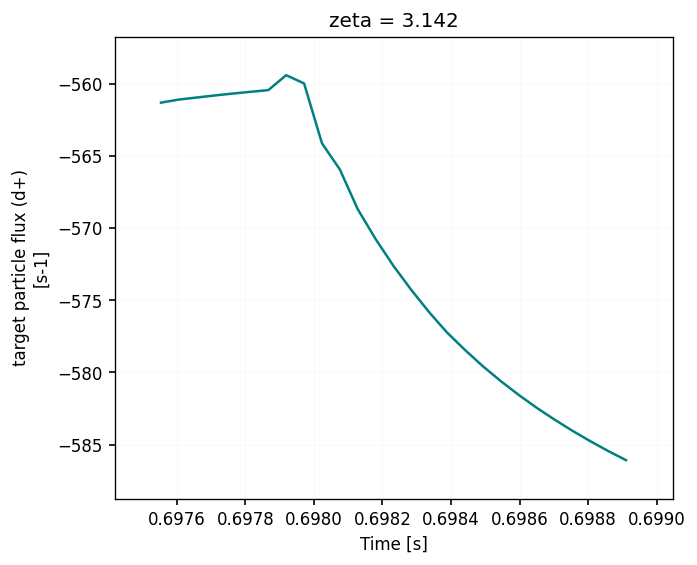

In [21]:
ds = casestore["frec_tune"].ds
(ds["pf_inner_lower_target_d+"].sum("x") * constants("q_e")).plot()

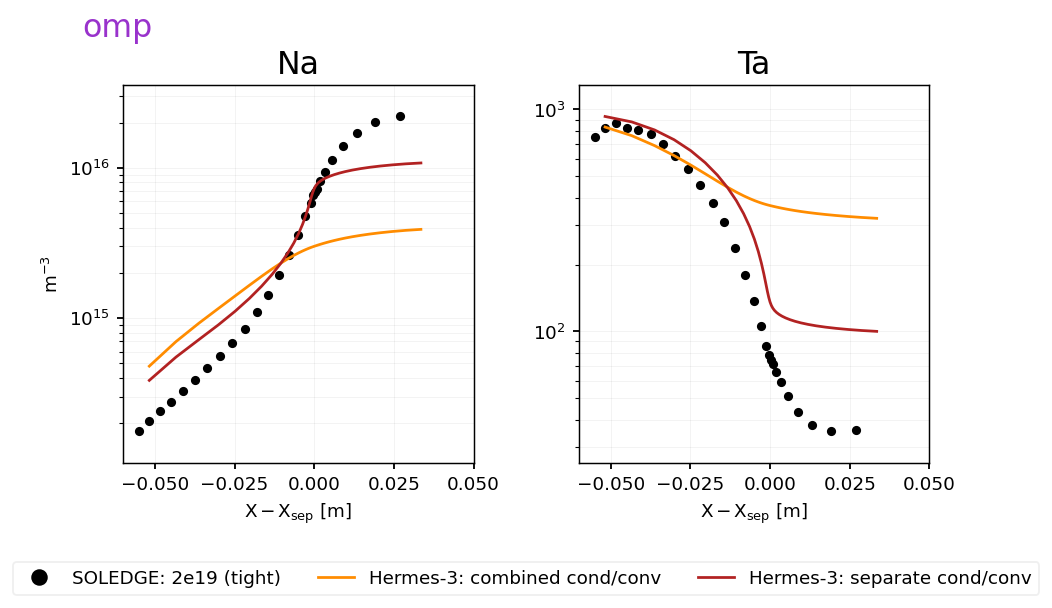

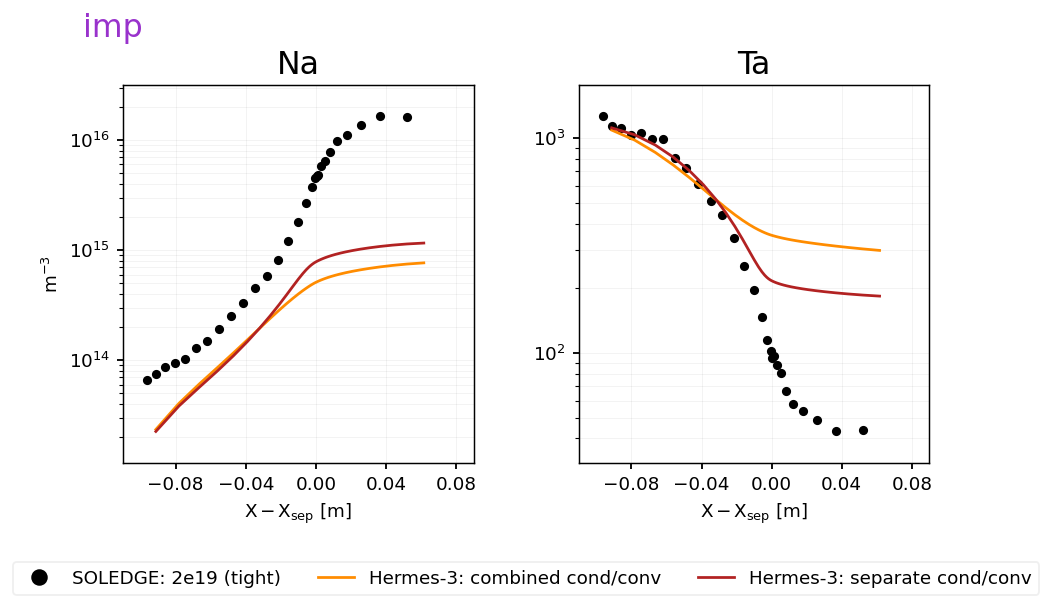

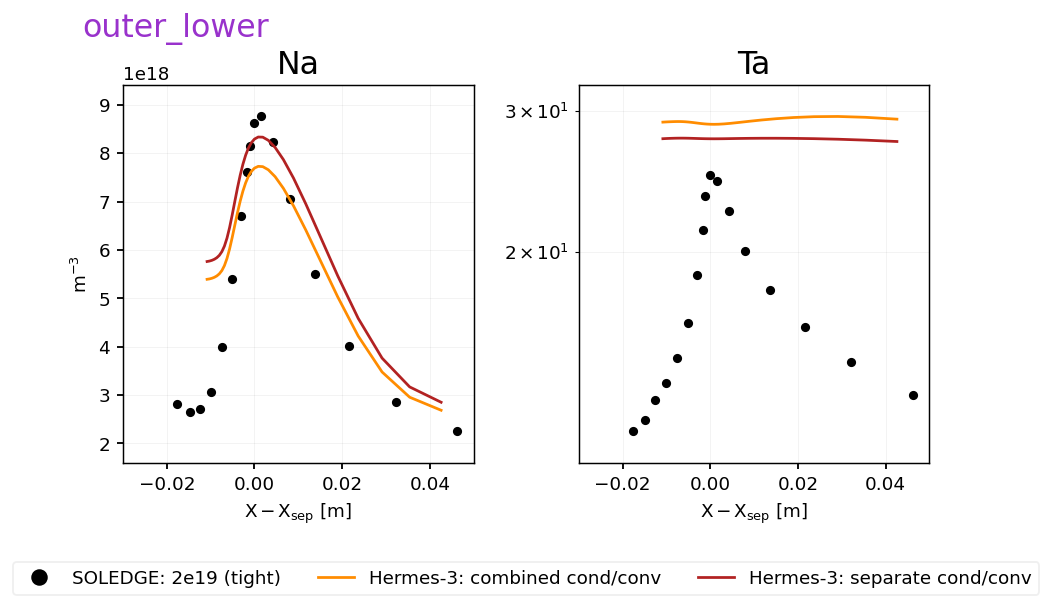

In [24]:

plt.close("all")
lineplot_compare(
    cases = { 


    "SOLEDGE: 2e19 (tight)" : dict(data=sl["tightwall_2e19"], color="black"),
    # "SOLPS: 2e19 (tight)" : dict(data=sp["nsep_3e19"], color="red"),
    
    "Hermes-3: frec tune" : dict(data=hr['frec_tune'], color = "teal"),
    r"Hermes-3: combined cond/conv" : dict(data=hr['afn_tunefrec'], color = "darkorange"),
    r"Hermes-3: separate cond/conv" : dict(data=hr['afn_seplims'], color = "firebrick"),
    # r"Hermes-3: Cond $\alpha$ 0.5" : dict(data=hr['afn_cond0.5'], color = "blue"),

    },
    regions = ["omp", "imp", "outer_lower"], 
    # regions = ["outer_lower"],
    # params = ["Ne", "Te"],
    # params = ["Ne", "Te", "Td+", "Na", "Ta"],
    params = ["Na", "Ta"],
    # params = ["Pe", "Pd+", "Pa"],
    mode = "log",
    dpi = 120,
    lw = 2
)

In [15]:
hr.keys()

dict_keys(['frec_tune', 'afn_frec', 'afn_tunefrec', 'afn_seplims', 'afn_cond0.5'])

c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)


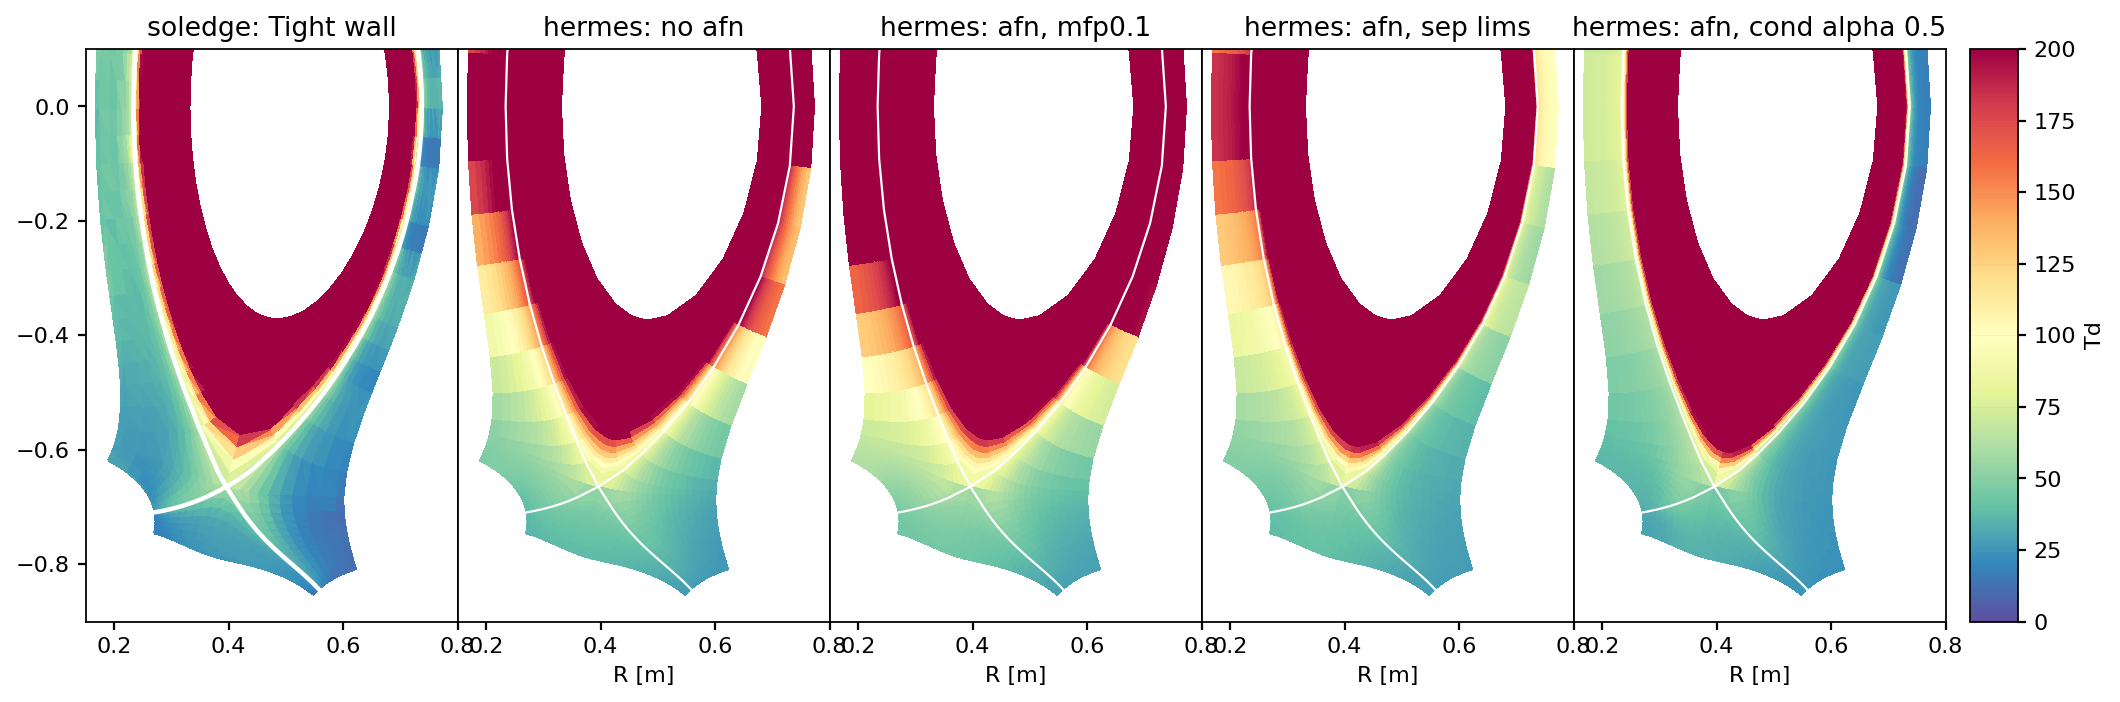

In [16]:
plt.close("all")
v = viewer_2d(
    "Td",
    [
        {"name" : "Tight wall", "code":"soledge", "path" : soledgecases["tightwall_2e19"]},
        # {"name" : "frec", "code" : "hermes", "ds" : casestore["frec"].ds.isel(t=-1)},
        # {"name" : "frec_new", "code" : "hermes", "ds" : casestore["frec_new"].ds.isel(t=-1)},
        
        {"name" : "no afn", "code" : "hermes", "ds" : casestore["frec_tune"].ds.isel(t=-1)},
        {"name" : "afn, mfp0.1", "code" : "hermes", "ds" : casestore['afn_tunefrec'].ds.isel(t=-1)},
        {"name" : "afn, sep lims", "code" : "hermes", "ds" : casestore['afn_seplims'].ds.isel(t=-1)},
        {"name" : "afn, cond alpha 0.5", "code" : "hermes", "ds" : casestore['afn_cond0.5'].ds.isel(t=-1)},
    ],
    logscale = False,
    vmin = 0,
    vmax = 200,
    # vmin = 1e17,
    # vmax = 1e19,
    dpi = 160,
    ylim = (-0.9,0.1),
    xlim = (0.15, 0.8),
    wspace = 0.0,
    cmap = "Spectral_r",
    slider = False
)

c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)


Text(0.5, 1.0, '')

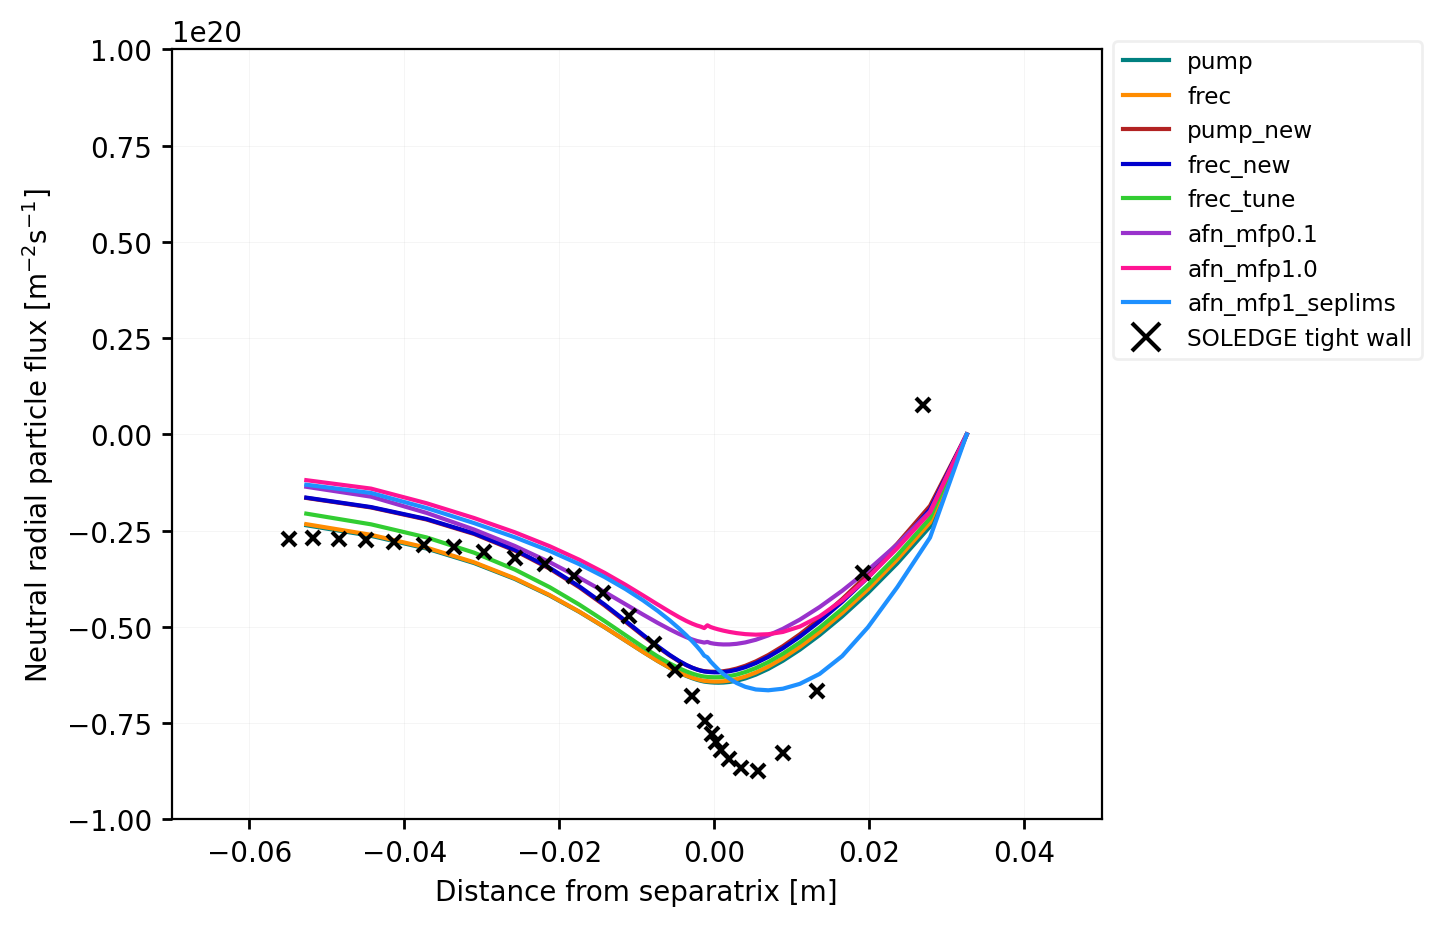

In [46]:
fig, ax = plt.subplots(dpi = 200)


for i, case in enumerate(casestore):
    
    ds = casestore[case].ds.isel(t=-1)
    d = ds.isel(x=slice(2,-2)).sum("theta")
    omp = ds.hermesm.select_region("outer_midplane_a").isel(x=slice(2,-2))
    dist = (omp["R"] - omp["R"][ds.metadata["ixseps1"]])
    ax.plot(dist, omp["pf_perp_diff_R_d"] / (omp["dy"]*omp["dz"]), label = case)

# ax2 = ax.twinx()
# ax2.plot(dist, omp["particle_flux_factor_d"])

# SOLPS
# ax.plot(sp["nsep_2e19"].regions["omp"].index, sp["nsep_2e19"].regions["omp"]["pfluxa3da"] * -1, label = "SOLPS wide wall (lo res)", color = "black", lw=0, marker = "o", ms = 3)
# ax.plot(sp["16x_mc"].regions["omp"].index, sp["16x_mc"].regions["omp"]["pfluxa3da"] * -1, label = "SOLPS wide wall (hi res)", color = "grey", lw=0, marker = "o", ms = 3)

# SOLEDGE
slc = SOLEDGEcase(path = soledgecases["tightwall_2e19"])
df = slc.get_1d_radial_data(["vxni", "Nni"])
df["NVxn"] = df["vxni"] * df["Nni"]
ax.plot(df["dist"], df["NVxn"], lw=0, marker = "x", ms = 5, markeredgewidth=1.5, label = "SOLEDGE tight wall", c = "black")

# slc = SOLEDGEcase(path = soledgecases["widewall_2e19"])
# df = slc.get_1d_radial_data(["vxni", "Nni"])
# df["NVxn"] = df["vxni"] * df["Nni"]
# ax.plot(df["dist"], df["NVxn"], lw=0, marker = "x", ms = 5, markeredgewidth=1.5, label = "SOLEDGE wide wall", c = "darkorange")

ax.set_ylabel("Neutral radial particle flux $[m^{-2}s^{-1}]$")
ax.set_xlabel("Distance from separatrix [m]")
fig.legend(loc = "upper left", bbox_to_anchor=(0.9,0.9), fontsize="small")
ax.set_xlim(-0.07, 0.05)
ax.set_ylim(-1.0e20, 1.0e20)
ax.set_title("")

Text(0.5, 1.0, '')

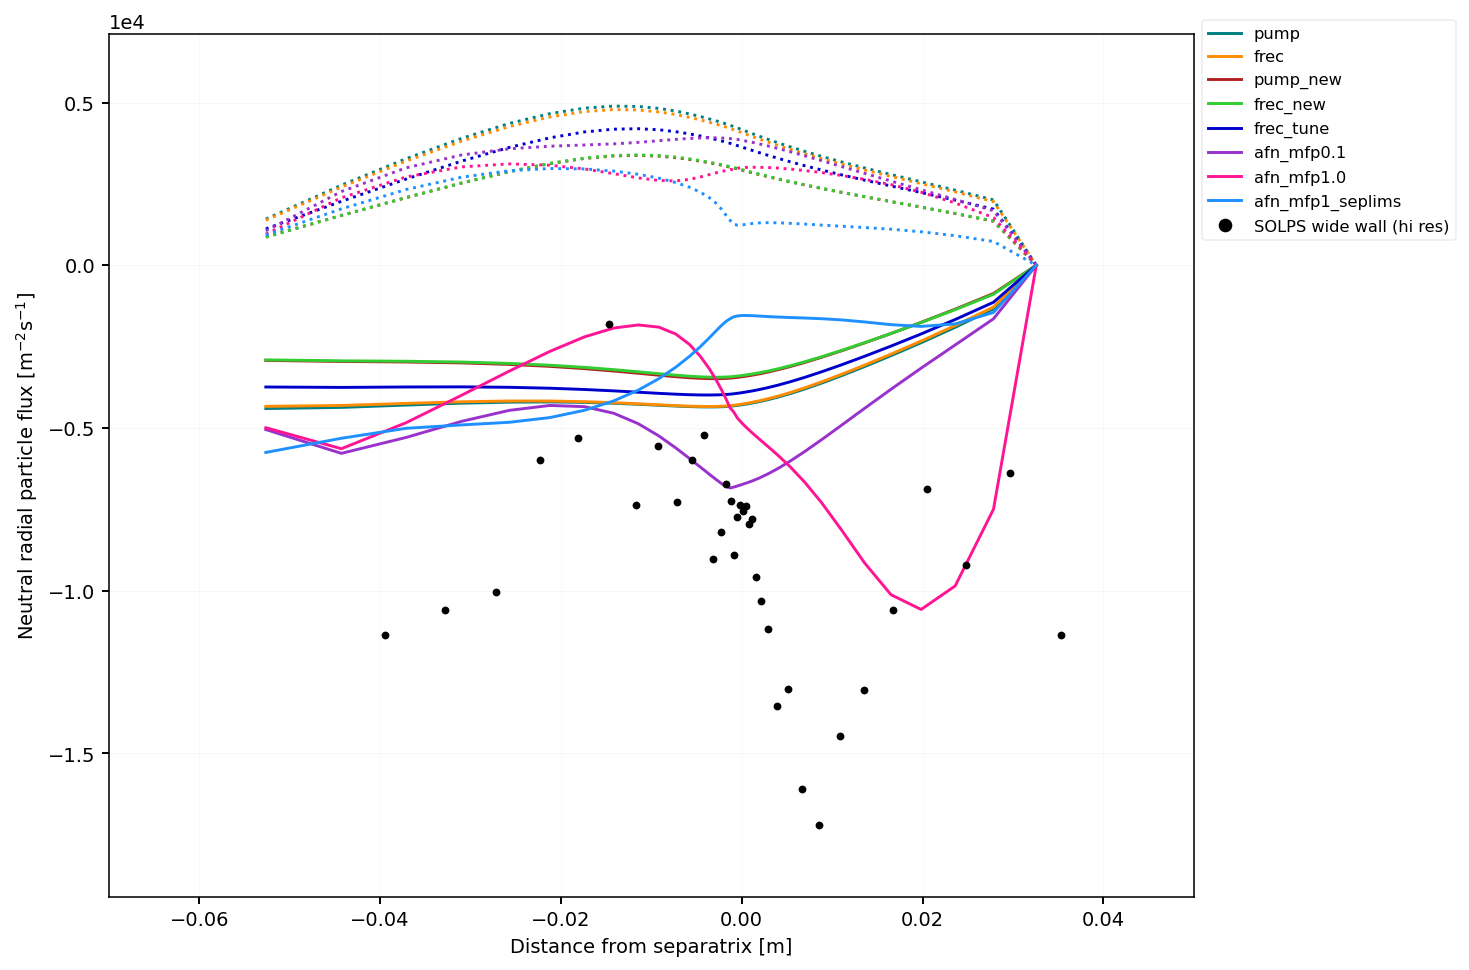

In [48]:
fig, ax = plt.subplots(figsize=(10,8), dpi = 140)
labels = ['noafn', 'afn_unchained', 'afn_chained', 'afn_chained_mfp5', 'afn_chained_mfp10']
colors = ["teal", "darkorange", "firebrick", "limegreen", "mediumblue", "darkorchid", "deeppink", 
                                                   "#1E90FF", "forestgreen", "#4169e1", "darkgoldenrod", "#9370db", "crimson", "#2f4f4f" ]
for i, case in enumerate(casestore):
    
    ds = casestore[case].ds.isel(t=-1)
    d = ds.isel(x=slice(2,-2)).sum("theta")
    omp = ds.hermesm.select_region("outer_midplane_a").isel(x=slice(2,-2))
    dist = (omp["R"] - omp["R"][ds.metadata["ixseps1"]])
    ax.plot(dist, omp["hf_perp_diff_R_d"] / (omp["dy"]*omp["dz"]), color = colors[i], ls = ":")
    # ax.plot(dist, omp["hf_perp_diff_R_d"] / (omp["dy"]*omp["dz"]),  color = colors[i], ls = "--")
    ax.plot(dist, omp["hf_perp_conv_R_d"] / (omp["dy"]*omp["dz"]),  color = colors[i], ls = "-", label = case)

# SOLPS
# ax.plot(sp["nsep_2e19"].regions["omp"].index, sp["nsep_2e19"].regions["omp"]["pfluxa3da"] * -1, label = "SOLPS wide wall (lo res)", color = "black", lw=0, marker = "o", ms = 3)
ax.plot(sp["16x_mc"].regions["omp"].index, sp["16x_mc"].regions["omp"]["pefluxa3da"] * -1, label = "SOLPS wide wall (hi res)", color = "black", lw=0, marker = "o", ms = 3)


ax.set_ylabel("Neutral radial particle flux $[m^{-2}s^{-1}]$")
ax.set_xlabel("Distance from separatrix [m]")
fig.legend(loc = "upper left", bbox_to_anchor=(0.9,0.9), fontsize="small")
ax.set_xlim(-0.07, 0.05)
# ax.set_ylim(-1.0e20, 1.0e20)
ax.set_title("")

In [48]:
calculate_simple_heat_balance(casestore["afn_new"].ds.isel(t=-1))

Wall reflective cooling:
inner_wall  : -0.012 [MW]
outer_wall  : -0.153 [MW]
pfr         : -0.145 [MW]
targets     : -0.061 [MW]
Total       : -0.371 [MW]

Recycling neutral energy source:
Total       : 0.618 [MW]


In [46]:
ds = casestore["afn_new"].ds.isel(t=-1)
m = ds.metadata

In [57]:
"""
Simple heat balance with things hardcoded
Currently only reflective wall cooling
"""
if ds["t"].shape != ():
    raise Exception("Please supply a single time slice")
places = {}

places["inner_wall  "] = ds.hermesm.select_region("inner_sol_edge")
places["outer_wall  "] = ds.hermesm.select_region("outer_sol_edge")
places["pfr         "] = ds.hermesm.select_region("pfr_edge")

if "Ed_wall_refl" in ds.data_vars:
    hflows = {}
    for place in places:
        ds_place = places[place]
        hflows[place] = ()
        hflows[place] = (ds_place["Ed_wall_refl"] * ds_place["dv"] ).sum().values * 1e-6
        
    hflows["targets     "] = (ds["Ed_target_refl"] * ds["dv"]).sum().values * 1e-6
    
    print("Wall reflective cooling:")
    tot = 0
    for name in hflows:
        print(f"{name}            : {hflows[name]:.3f} [MW]")
        tot += hflows[name]
        
    print(f"Total                   : {tot:.3f} [MW]\n")
else:
    print("No wall heat fluxes found in dataset")
    
print("Recycling neutral energy source:")
en_rec = (ds["Ed_target_recycle"] * ds["dv"]).sum(["x", "theta"]).values * 1e-6
print(f"Total                   : {en_rec:.3f} [MW]")

print(f"\nBC heat fluxes:")
sheath_i = 0
sheath_e = 0
for target in m["targets"]:
    sheath_i += ds[f"hf_{target}_target_d+"].sum().values * 1e-6
    sheath_e += ds[f"hf_{target}_target_e"].sum().values * 1e-6
    
print(f"Target sheath ion flux  : {sheath_i:.3f} [MW]")
print(f"Target sheath ele flux  : {sheath_e:.3f} [MW]")

Wall reflective cooling:
inner_wall              : -0.012 [MW]
outer_wall              : -0.153 [MW]
pfr                     : -0.145 [MW]
targets                 : -0.061 [MW]
Total                   : -0.371 [MW]

Recycling neutral energy source:
Total                   : 0.618 [MW]

BC heat fluxes:
Target sheath ion flux  : -1.092 [MW]
Target sheath ele flux  : -0.622 [MW]


In [58]:
0.7*0.8

0.5599999999999999

In [47]:
hf_target = 0
for target in m["targets"]:
    hf_target += ds[f"hf_{target}_target_d+"].sum().values * 1e-6
    
hf_target

-1.0916816241749911

In [39]:
for name in casestore:
    casestore[name].ds = calculate_radial_fluxes(casestore[name].ds)
    casestore[name].ds = calculate_target_fluxes(casestore[name].ds)

Calculating target recycling:
inner_lower
outer_lower
inner_upper
outer_upper
Calculating target recycling:
inner_lower
outer_lower
inner_upper
outer_upper
Calculating target recycling:
inner_lower
outer_lower
inner_upper
outer_upper
Calculating target recycling:
inner_lower
outer_lower
inner_upper
outer_upper
Calculating target recycling:
inner_lower
outer_lower
inner_upper
outer_upper
Calculating target recycling:
inner_lower
outer_lower
inner_upper
outer_upper
Calculating target recycling:
inner_lower
outer_lower
inner_upper
outer_upper


# SOLPS

In [5]:
sp["nsep_2e19"].regions["omp"].columns

Index(['an3da', 'dn3da', 'dp3da', 'ke3da', 'ki3da', 'mn3da', 'ne3da', 'po3da',
       'te3da', 'ti3da', 'vs3da', 'vx3da', 'vy3da', 'vol3da', 'tie3da',
       'dab23da', 'tab23da', 'dmb23da', 'tmb23da', 'dib23da', 'tib23da',
       'rfluxa3da', 'rfluxm3da', 'pfluxa3da', 'pfluxm3da', 'refluxa3da',
       'refluxm3da', 'pefluxa3da', 'pefluxm3da', 'emiss3da', 'emissmol3da',
       'srcml3da', 'edissml3da', 'pab23da', 'pmb23da', 'pib23da', 'dnb23da',
       'pnb23da', 'tnb23da', 'emisstot3da', 'daeb23da', 'dmeb23da', 'dneb23da',
       'danb23da', 'taib23da', 'tmib23da', 'tnib23da', 'vrab23da', 'vpab23da',
       'vtab23da', 'vrmb23da', 'vpmb23da', 'vtmb23da', 'e0ab23da', 'e0mb23da',
       'eneutrad3da', 'emolrad3da', 'eionrad3da', 'etotrad3da', 'totrad3da',
       'Zeff3da', 'AMJUEL_H.4_2.1.5_3da', 'AMJUEL_H.10_2.1.5_3da',
       'AMJUEL_H.2_3.1.8FJ_3da', 'HYDHEL_H.2_2.2.9_3da',
       'HYDHEL_H.2_2.2.5_3da', 'HYDHEL_H.2_2.2.10_3da', 'AMJUEL_H.0_0.3T_3da',
       'AMJUEL_H.1_0.3T_3da', 'A

In [23]:
bal = nc.Dataset(os.path.join(solpscases["nsep_2e19"], "balance.nc"))

In [24]:
var = bal["pefluxa"][:]

b2fgmtry loaded from .pkl


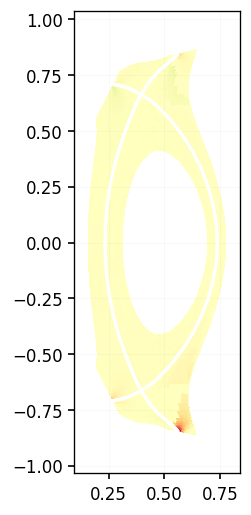

In [30]:
p = SOLPSplot(path = solpscases["nsep_2e19"], data = var)

fig, ax = plt.subplots()
p.plot(ax = ax, vmin = -3e6, vmax = 3e6, cmap = "RdBu_r")

In [14]:
p.variables

NameError: name 'p' is not defined

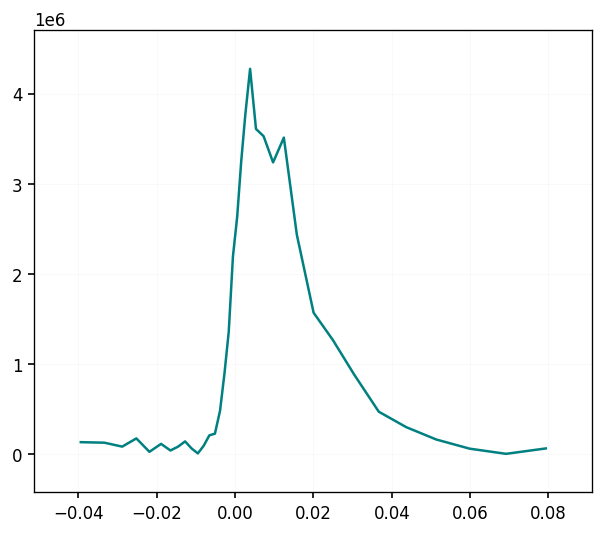

In [10]:
df = sp["nsep_2e19"].regions["outer_lower"]

fig, ax = plt.subplots()

ax.plot(df.index, df["refluxa3dr"])